# Introduction

## 1) First Approach

In [1]:
def count_divisors(n):
    count = 0 
    d=1
    while d<=n:
        if n%d==0:
            count+=1
        d+=1
    return count 

For the solution 1 we wrote a function that takes a parameter n and count a number of
devisors for a given number by checking the n%d=0 ( if this number if divide d so d is a
divisor of n ) after that we calculate the sum of d all these under the condition d<=n .

In [2]:
%timeit count_divisors(10)
%timeit count_divisors(1000)
%timeit count_divisors(10000000)

3.71 µs ± 780 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
307 µs ± 56.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
3.4 s ± 340 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## 2) Second Approach

In [4]:
def count_divisors_opt(n):
    count =0
    d =1
    while d*d <=n:
        if n%d == 0:
            count+=1 if n/d ==d else 2
        d+=1
    return count

For the solution 2 we count the number of devisor’s by doing the same thing in the solution
1 but in the different condition which ( d*d<=n) .


## 3) Which algorithm is faster :

In [6]:
%timeit count_divisors_opt(10)
%timeit count_divisors_opt(1000)
%timeit count_divisors_opt(10000000)

2.67 µs ± 509 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
14.2 µs ± 1.64 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
1.4 ms ± 200 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


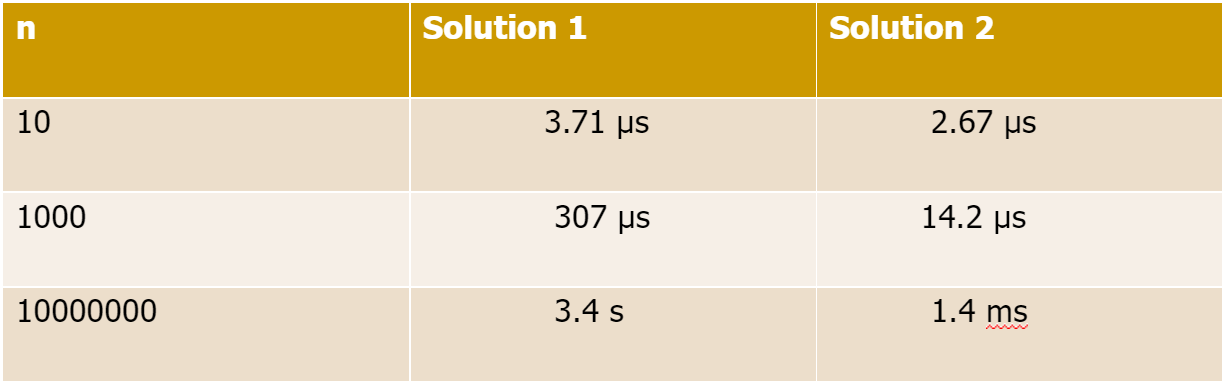

In [8]:
from IPython import display
display.Image("divisor.PNG")

## 4) Number of operations :

The first program execute n division, n addition and k addition where k is the number of divisors.
so the total number of operations is 2n+k.

The second program execute sqrt(n) multiplication( d*d),sqrt(n) division(n%d) , sqrt(n) addition and k divsion + k addition where k is the number of divisors of n.

So The total number of operations is 3 * sqrt(n) + 2*K (k number of divisors)

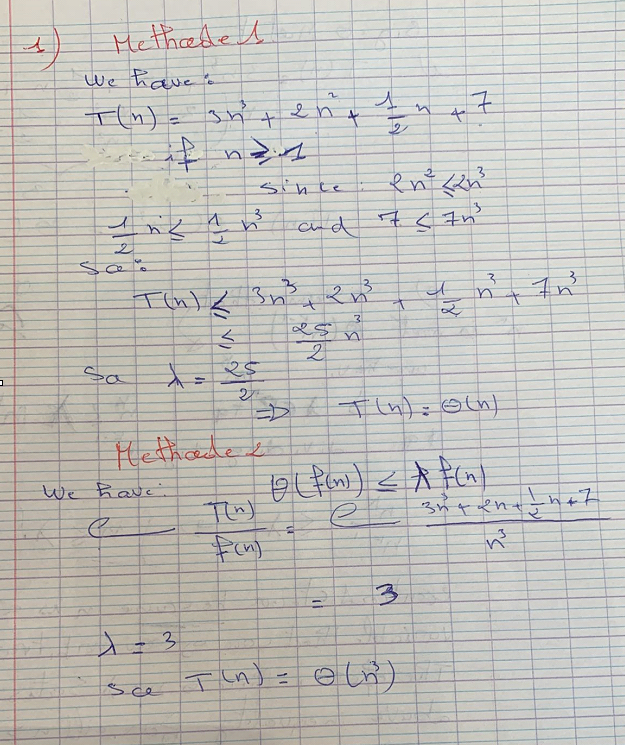

In [9]:
display.Image("T(n).PNG")

# Merge sort

In [21]:
import numpy as np
A = np.array([2,5,8,17,19])
B = np.array([1,4,5,7,11])

In [28]:
def merge(A, B):
    c = []
    i = j = k = 0
    while i < len(A) and j < len(B):
        if A[i] <= B[j]:
            c.append(A[i]) 
            i += 1
        else:
            c.append(B[j]) 
            j += 1
        k += 1
    while i < len(A):
        c.append(A[i])
        i += 1
        k += 1
    while j < len(B):
        c.append(B[j])
        j += 1
        k += 1
    return c



        

In [29]:
merge(A, B)

[1, 2, 4, 5, 5, 7, 8, 11, 17, 19]

n = len(A)
m = len(B)
on a la complexité de la 1er boucle est : O(n+m) (c'est la complexité du max(n,m))???
la complexité de la 2eme while est: n
la complexité de la 2eme while est: m

The Master theorem is used to analyze the time complexity of recursive functions. In the case of the merge() function, which merges two sorted arrays into a single sorted array, the input size is n and the function calls two sub-problems of size n/2. Using the Master theorem, we can express the complexity of merge() as T(n) = 2T(n/2) + O(n). If we can show that the non-recursive part of the function has a complexity of O(n^c) for some constant c > 1, we can conclude that the complexity of merge() is O(n^c). The creation of the resulting array has a complexity of O(n), which is O(n^1), so we can choose c = 1.1, for example. For this value of c, we have c > log_b(a) (where a = 2 and b = 2), so the complexity of merge() is O(n^1.1). This is slightly higher than O(n) but lower than O(n log n).

# Binary search

In [30]:
def binarySearch(array, target): #returns the index or the target 
    low = array[0]
    high = array[len(array)-1]
    if array[0] == target:
            return 0
    elif array[len(array)-1] == target:
        return len(array)-1
    else:
        while(low <= high):
            mid = int((low+high)/2)
            if array[mid]==target:
                return mid
            elif array[mid] > target:
                high = mid -1
            elif array[mid] < target:
                low = mid +1
        return -1  #returns -1 if the target does not exist

The while loop repeats until either the target is found or the size of the remaining subarray becomes 0. Since the size of the remaining subarray is halved at each iteration of the loop, the maximum number of iterations is log2(n). Each iteration takes constant time, so the total time complexity of the loop is O(log n)

# Matrix Multiplication 

In [31]:
import numpy as np

In [36]:
def matrix_multiply(A, B):
    m, n = len(A), len(A[0])
    p, q = len(B), len(B[0])
    
    if n != p:
        raise ValueError("Invalid dimensions for matrix multiplication")
        
    result = [[0] * q for _ in range(m)]
    
    for i in range(m):
        for j in range(q):
            for k in range(n):
                result[i][j] += A[i][k] * B[k][j]
    
    return result


In [35]:
A = [[1, 2, 3],
     [4, 5, 6],
     [7, 8, 9]]
B = [[9, 8, 7],
     [6, 5, 4],
     [3, 2, 1]]

In [37]:
C = matrix_multiply(A, B)
print(C)

[[30, 24, 18], [84, 69, 54], [138, 114, 90]]


The complexity of our algorithme is O(n**3)

### Optimisation

In [38]:
def matrix_multiply_optimized(A, B, block_size):
    """
    Multiplies two matrices using optimized block by block multiplication
    
    Parameters:
    A (numpy.ndarray): First matrix
    B (numpy.ndarray): Second matrix
    block_size (int): Size of the blocks
    
    Returns:
    C (numpy.ndarray): Product of A and B
    """
    
    # Get the dimensions of A and B
    m, n = A.shape
    n2, p = B.shape
    
    # Check if the matrices can be multiplied
    if n != n2:
        print("Matrices cannot be multiplied")
        return None
    
    # Create an empty matrix to hold the product
    C = np.zeros((m, p))
    
    # Multiply the matrices block by block
    for i in range(0, m, block_size):
        for j in range(0, p, block_size):
            for k in range(0, n, block_size):
                # Multiply the block of A and B
                C[i:i+block_size, j:j+block_size] += np.dot(A[i:i+block_size, k:k+block_size], B[k:k+block_size, j:j+block_size])
    
    return C

#### Dans C++

## Quiz 

1) The time complexity for the following fragment is : A) O(n)

2) The time complexity for the following fragment is : D) O(log_k(n))

3) The time complexity for the following fragment is : C) O(n*m)